In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle



In [15]:
dataset = pd.read_csv('hp_data.csv')
dataset

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26054,26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26055,26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26056,26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [16]:
from sklearn.model_selection import train_test_split

# Define features and target
X = dataset.drop("target", axis=1)  
y = dataset["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
 

# Scaling data with feature names preserved
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
model = LogisticRegression(max_iter=500)  # Increase iterations
model.fit(X_train, y_train)

d:\Programming\Python\DEPI-Data\DEPI-Data-Science-Project\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [18]:
# Predict on the test data
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8463161933998465
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      2319
           1       0.83      0.91      0.87      2893

    accuracy                           0.85      5212
   macro avg       0.85      0.84      0.84      5212
weighted avg       0.85      0.85      0.84      5212

Confusion Matrix:
 [[1777  542]
 [ 259 2634]]


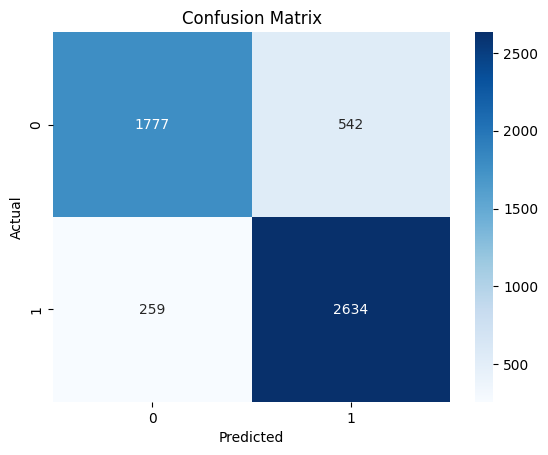

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
with open('hyperTension_model.pkl', 'wb') as file:
    pickle.dump(model, file)
